<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo39/blob/main/Reto_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

*   Ciencia y analítica de datos (TC4029.10)
*   JUAN FELIPE TORO SALGADO --- MATRICULA: A01794247
*   ALEJANDRA ISLAS ------MATRICULA:A01794452
*   PROFESOR:Dra. María de la Paz Rico Fernández


* Limpieza de base de datos.
*  Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
df = pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',encoding = "ISO-8859-1")
print(df.shape)
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


# Limpieza de base de datos.

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [8]:
# media par arremplazar valor CONDUCT_mS/cm
meanCONDUCT_mS = df["CONDUCT_mS/cm"].mean()
print(meanCONDUCT_mS)

# moda para  reemplazar valor CALIDAD_CONDUC
modeCALIDAD_CONDUC= df["CALIDAD_CONDUC"].mode()
print(modeCALIDAD_CONDUC)
# media para reemplazar ALC_mg/L
meanALC_mg = df["ALC_mg/L"].mean()
print(meanALC_mg)
#  moda para  reemplazar valor CALIDAD_ALC
modeCALIDAD_ALC= df["CALIDAD_ALC"].mode()
print(modeCALIDAD_ALC)

ndf=df


1138.9530131826743
0    Permisible para riego
dtype: object
235.63375939849624
0    Alta
dtype: object


In [9]:
# Remplazo de valores 
ndf["CONDUCT_mS/cm"].replace(np.nan,meanCONDUCT_mS, inplace=True)
ndf["CALIDAD_CONDUC"].replace(np.nan, "Permisible para riego", inplace=True)
ndf["ALC_mg/L"].replace(np.nan,meanALC_mg , inplace=True)
ndf["CALIDAD_ALC"].replace(np.nan, "Alta", inplace=True)
ndf.dropna(subset=["DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin"], axis=0, inplace=True)


In [21]:
# Remplazo de valores 
df.replace("NA",np.nan,inplace=True) # remplaza los  datos NA  por NaN
df.replace("Missing",np.nan,inplace=True)#remplaza los  datos perdidos  por NaN
ndf=df
ndf['SDT_M_mg/L'].replace('<25', 25, inplace=True)
ndf['FLUORUROS_mg/L'].replace('<0.2', 0.2, inplace=True)
ndf['DUR_mg/L'].replace('<20', 20, inplace=True)
ndf['COLI_FEC_NMP/100_mL'].replace('<1.1', 1.1, inplace=True)
ndf['N_NO3_mg/L'].replace('<0.02', 0.02, inplace=True)
ndf['AS_TOT_mg/L'].replace('<0.01', 0.01, inplace=True)
ndf['CD_TOT_mg/L'].replace('<0.003', 0.003, inplace=True)
ndf['CR_TOT_mg/L'].replace('<0.005', 0.005, inplace=True)
ndf['HG_TOT_mg/L'].replace('<0.0005', 0.0005, inplace=True)
ndf['PB_TOT_mg/L'].replace('<0.005', 0.005, inplace=True)
ndf['MN_TOT_mg/L'].replace('<0.0015', 0.0015, inplace=True)
ndf['FE_TOT_mg/L'].replace('<0.025', 0.025, inplace=True)
ndf.columns
 
ndf.drop(['SDT_mg/L'], axis = 'columns', inplace=True)

In [22]:
ndf.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [12]:

ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
     'AS_TOT_mg/L','CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
     'FE_TOT_mg/L']] = ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
                            'N_NO3_mg/L', 'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L',
                            'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']] .astype("float")



In [13]:
ndf.dtypes


CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_

# Explorar cada datos  e identificacion
1. Identificando tendencias centrales promedio, media y mediana de los datos.
2. Identificar medidas de dispersión, máximo, mínimo .
3. Identificar medidas de posición no centrales , los cuartiles , outliers.
4. Identificar correlaciones

In [14]:
ndf.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1064.0,-101.888948,6.713487,-116.66425,-105.394575,-102.173075,-98.974716,-86.864120
LATITUD,1064.0,23.169131,3.888265,14.56115,20.221577,22.617190,25.510285,32.677713
PERIODO,1064.0,2020.000000,0.000000,2020.00000,2020.000000,2020.000000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.908849,116.765811,26.64000,164.203750,216.450000,292.710000,1650.000000
CONDUCT_mS/cm,1064.0,1140.533664,1243.926518,50.40000,506.000000,824.000000,1322.250000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SDT_M_mg/L,1064.0,897.079953,2754.019397,25.00000,337.700000,551.400000,917.000000,82170.000000
FLUORUROS_mg/L,1064.0,1.078534,1.927288,0.20000,0.268900,0.505450,1.140800,34.803300
DUR_mg/L,1064.0,348.368523,360.019564,20.00000,121.274100,245.662350,454.139700,3810.692200
COLI_FEC_NMP/100_mL,1064.0,356.667763,2056.221592,1.10000,1.100000,1.100000,11.000000,24196.000000


In [16]:
ndf.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LONGITUD,1.000000,-0.760984,NaN,0.166584,0.060720,NaN,-0.013938,-0.122805,0.087853,-0.084512,-0.107243,-0.077213,0.043600,0.058877,0.040205,-0.004521,-0.036191,0.021953
LATITUD,-0.760984,1.000000,NaN,-0.080080,0.053822,NaN,0.059823,0.130944,0.086062,0.062964,0.150184,0.090377,-0.053238,-0.058669,-0.100871,-0.045640,-0.036665,-0.041845
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.166584,-0.080080,NaN,1.000000,0.219080,NaN,0.079205,0.068119,0.242252,-0.016794,0.000075,0.072722,0.032638,-0.014400,0.067303,0.014874,0.129623,0.043463
CONDUCT_mS/cm,0.060720,0.053822,NaN,0.219080,1.000000,NaN,0.286337,-0.025695,0.692092,0.017627,0.219253,-0.004032,0.029009,0.004381,0.059466,0.023981,0.095770,0.083209
SDT_mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SDT_M_mg/L,-0.013938,0.059823,NaN,0.079205,0.286337,NaN,1.000000,-0.013957,0.347139,-0.001195,0.101691,-0.010255,0.010788,-0.000685,0.015285,-0.005583,0.018866,0.020088
FLUORUROS_mg/L,-0.122805,0.130944,NaN,0.068119,-0.025695,NaN,-0.013957,1.000000,-0.150227,0.003326,-0.019398,0.443864,-0.015178,-0.005274,-0.025936,-0.032378,-0.050019,-0.010045
DUR_mg/L,0.087853,0.086062,NaN,0.242252,0.692092,NaN,0.347139,-0.150227,1.000000,0.031583,0.301493,-0.106883,0.024973,0.007377,0.064723,-0.019020,0.083693,0.059832
COLI_FEC_NMP/100_mL,-0.084512,0.062964,NaN,-0.016794,0.017627,NaN,-0.001195,0.003326,0.031583,1.000000,-0.000804,0.038001,-0.001675,-0.008852,-0.007495,0.022462,-0.005425,0.003026


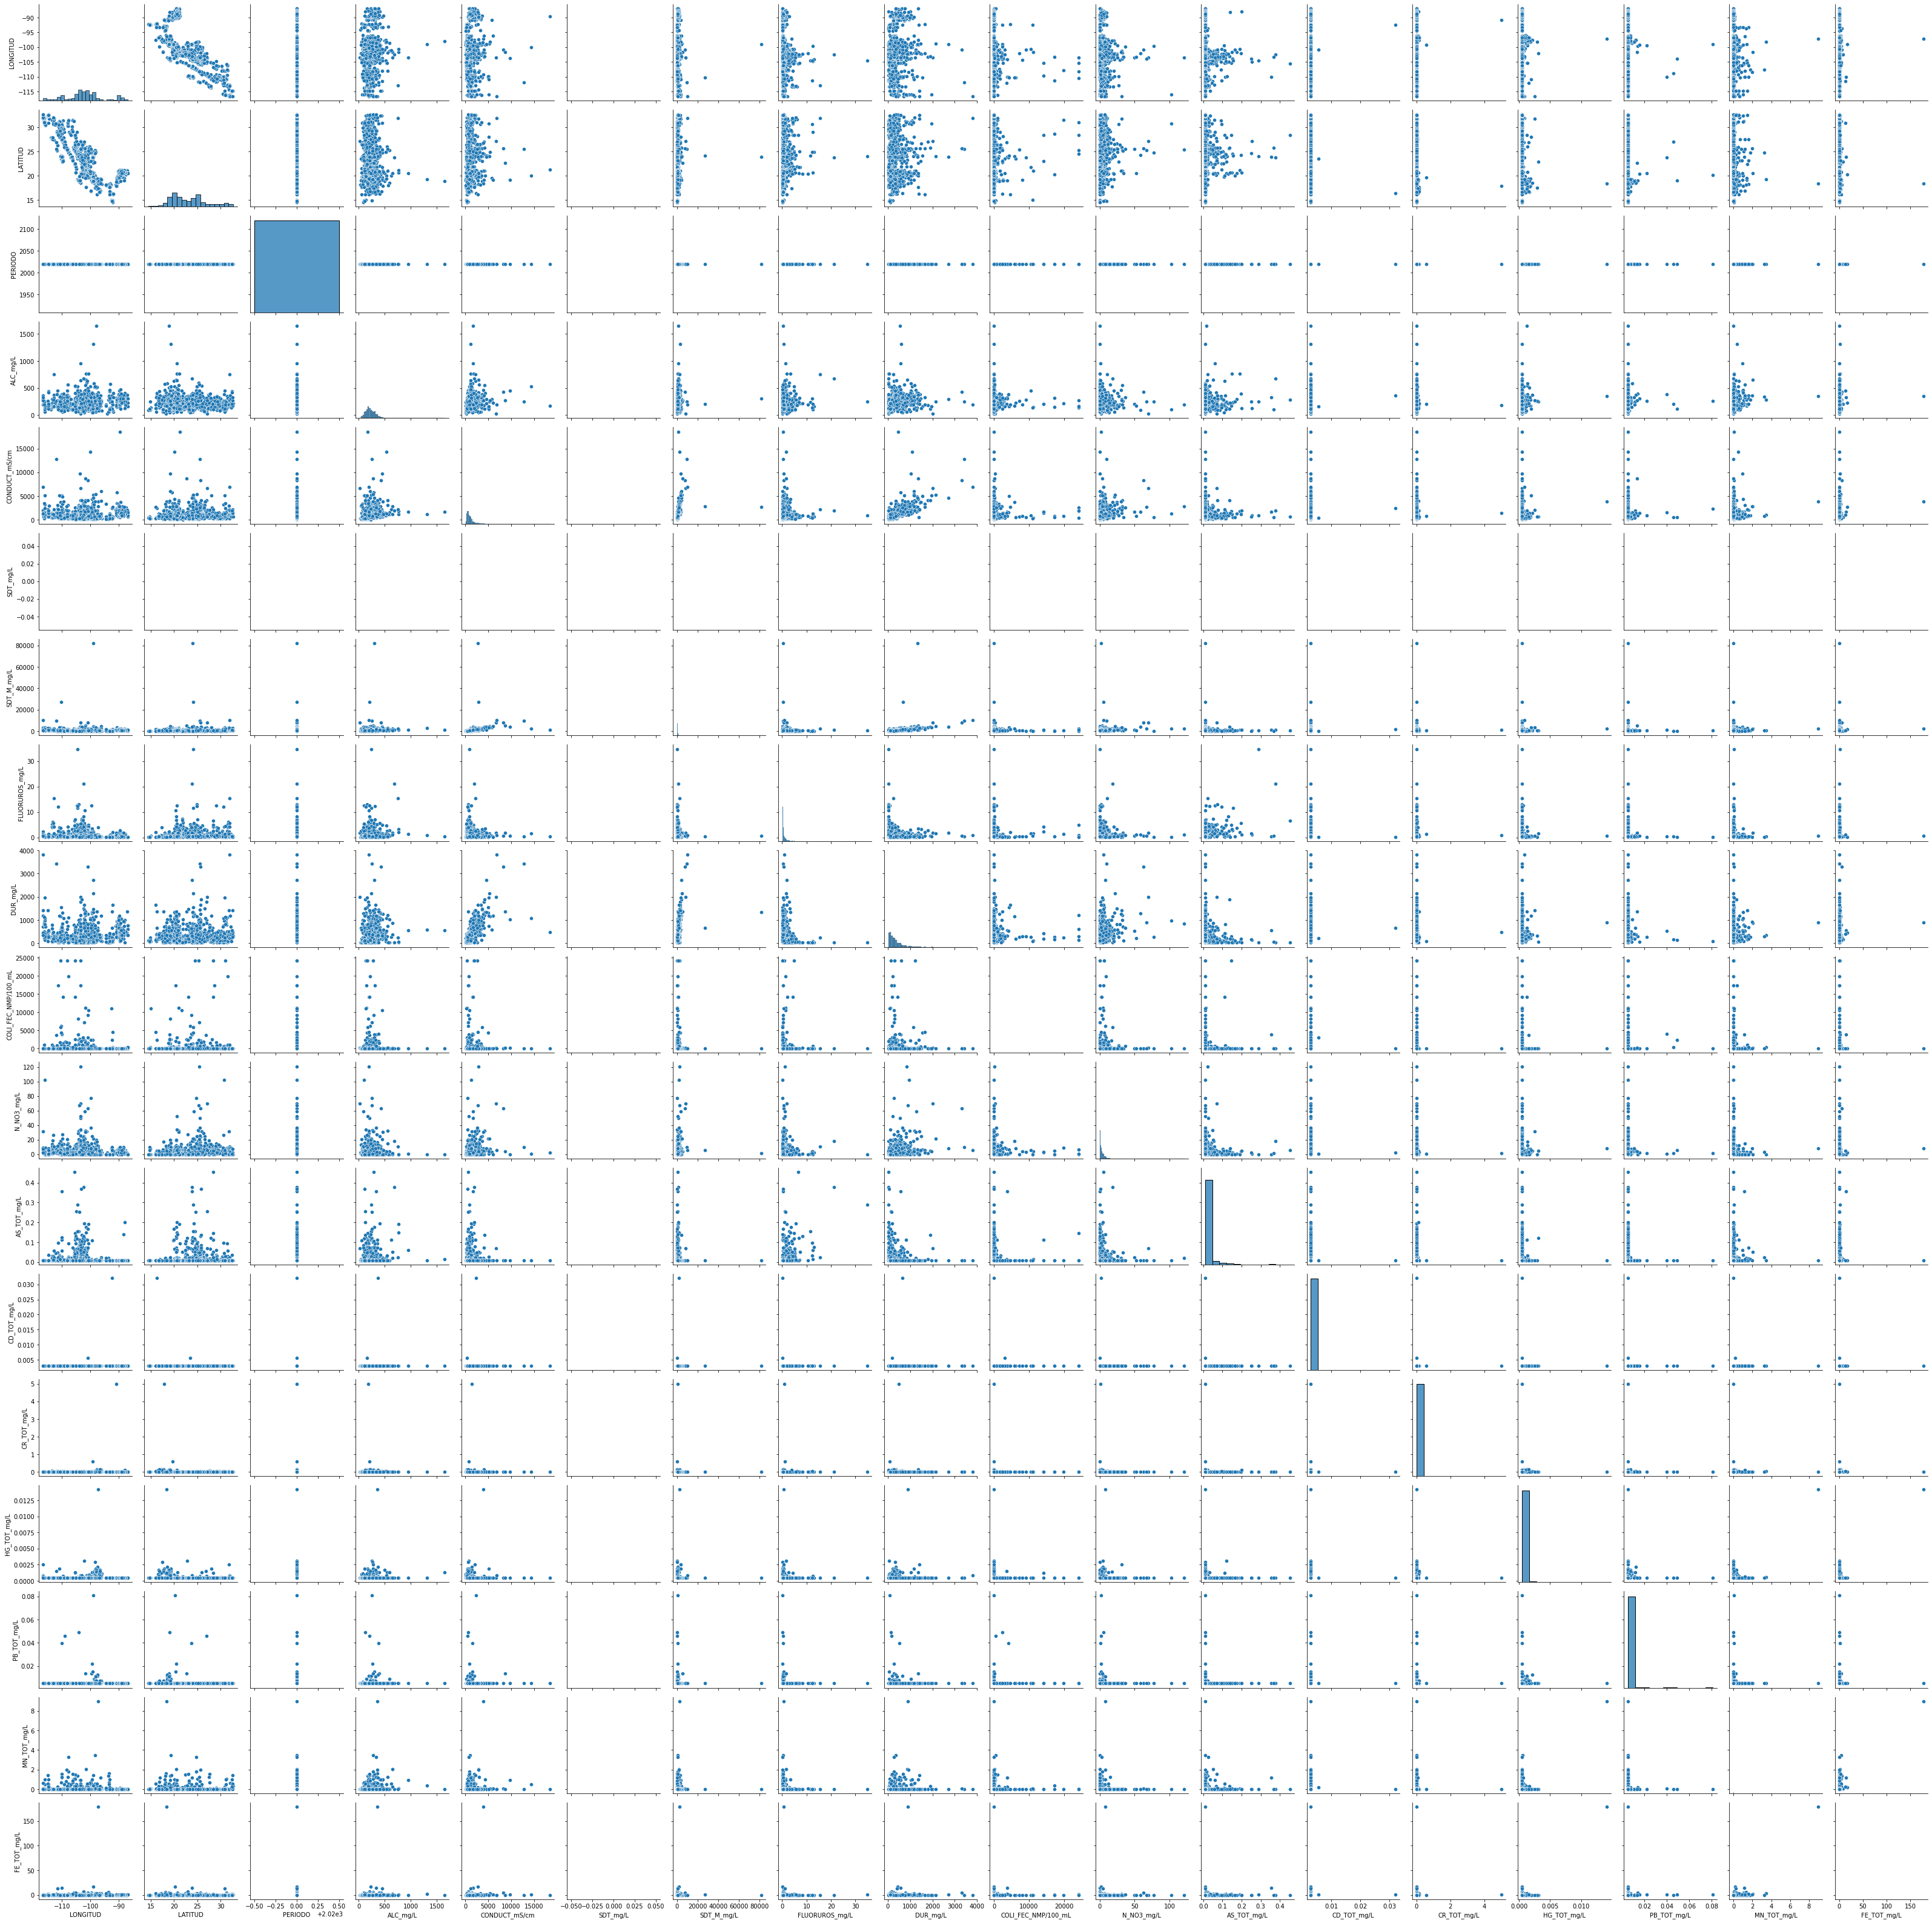

In [17]:
g = sns.PairGrid(ndf)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)